### Import dependencies

In [1]:
import pandas as pd

import polars_bio as pb

/home/jwinter/TBD/proj2/polars-bio/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:polars_bio:Creating BioSessionContext


### Usage examples

In [14]:
pb.set_option("datafusion.execution.target_partitions", "2")

#### Usage example - .fastq file

In [ ]:
result = pb.base_sequence_quality("example.fastq", output_type="pandas.DataFrame").sort_values(by="pos")
print(result)

    pos        avg    q1  median    q3  lower  upper
88    0  32.548723  31.0    34.0  34.0   26.5   38.5
46    1  32.719772  31.0    34.0  34.0   26.5   38.5
99    2  32.789697  31.0    34.0  34.0   26.5   38.5
75    3  36.162011  37.0    37.0  37.0   37.0   37.0
84    4  36.122733  37.0    37.0  37.0   37.0   37.0
..  ...        ...   ...     ...   ...    ...    ...
19   96  32.998462  34.0    35.0  35.0   32.5   36.5
64   97  32.922582  33.0    35.0  35.0   30.0   38.0
70   98  32.883908  33.0    35.0  35.0   30.0   38.0
80   99  32.836223  33.0    35.0  35.0   30.0   38.0
51  100  31.190304  30.0    34.0  35.0   22.5   42.5

[101 rows x 7 columns]


##### Results visualization


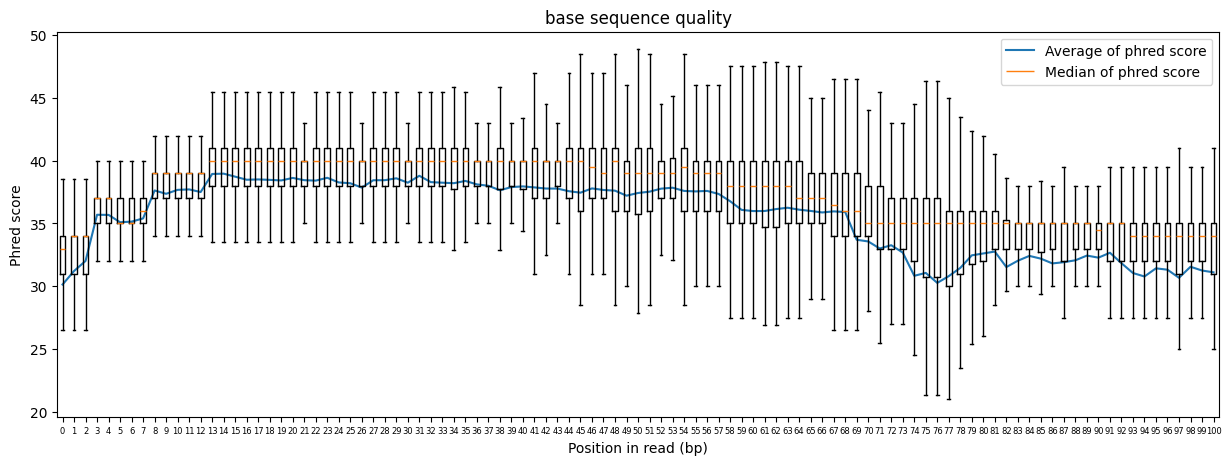

In [19]:
pb.visualize_base_sequence_quality(result)

##### Performance Benchmarking
| Implementation | Target Partitions | Time  |
| -------------- | ----------------- | ----- |
| fastqc-rs      | -                 | 22.9s |
| polars_bio     | 1                 | 9.0s  |
| polars_bio     | 2                 | 7.8s  |
| polars_bio     | 4                 | 14.9s |
| polars_bio     | 8                 | 7.4s  |

- The measured execution time is for the algorithm to run on file ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR194/ERR194147/ERR194147.fastq.gz, which contains about 8,240,000 records.
- The `fastqc-rs` execution time applies only to the base sequence quality task (pieces of code relating to other tasks have been removed for the purpose of this comparison).


#### Usage example - .csv file

In [20]:
pb.base_sequence_quality("example.csv").sort(by="pos")

pos,avg,q1,median,q3,lower,upper
u64,f64,f64,f64,f64,f64,f64
0,30.135,31.0,33.0,34.0,26.5,38.5
1,31.21,31.0,34.0,34.0,26.5,38.5
2,32.015,31.0,34.0,34.0,26.5,38.5
3,35.69,35.0,37.0,37.0,32.0,40.0
4,35.68,35.0,37.0,37.0,32.0,40.0
…,…,…,…,…,…,…
96,31.315,32.0,34.0,35.0,27.5,39.5
97,30.67,31.0,34.0,35.0,25.0,41.0
98,31.55,32.0,34.0,35.0,27.5,39.5


#### Usage example - .parquet file

In [21]:
pb.base_sequence_quality("example.parquet").sort(by="pos")

pos,avg,q1,median,q3,lower,upper
u64,f64,f64,f64,f64,f64,f64
0,30.135,31.0,33.0,34.0,26.5,38.5
1,31.21,31.0,34.0,34.0,26.5,38.5
2,32.015,31.0,34.0,34.0,26.5,38.5
3,35.69,35.0,37.0,37.0,32.0,40.0
4,35.68,35.0,37.0,37.0,32.0,40.0
…,…,…,…,…,…,…
96,31.315,32.0,34.0,35.0,27.5,39.5
97,30.67,31.0,34.0,35.0,25.0,41.0
98,31.55,32.0,34.0,35.0,27.5,39.5


#### Usage example - `polars.lazyframe.frame.LazyFrame` object

In [22]:
a_lazyframe = pb.read_fastq("./example.fastq")
print(type(a_lazyframe))
pb.base_sequence_quality(a_lazyframe).sort(by="pos")

INFO:polars_bio:Table: example registered for path: ./example.fastq


<class 'polars.lazyframe.frame.LazyFrame'>


200rows [00:00, 211459.74rows/s]


pos,avg,q1,median,q3,lower,upper
u64,f64,f64,f64,f64,f64,f64
0,30.135,31.0,33.0,34.0,26.5,38.5
1,31.21,31.0,34.0,34.0,26.5,38.5
2,32.015,31.0,34.0,34.0,26.5,38.5
3,35.69,35.0,37.0,37.0,32.0,40.0
4,35.68,35.0,37.0,37.0,32.0,40.0
…,…,…,…,…,…,…
96,31.315,32.0,34.0,35.0,27.5,39.5
97,30.67,31.0,34.0,35.0,25.0,41.0
98,31.55,32.0,34.0,35.0,27.5,39.5


#### Usage example - `polars.dataframe.frame.DataFrame` object

In [23]:
a_lazyframe = pb.read_fastq("./example.fastq")
a_dataframe = a_lazyframe.collect()
print(type(a_dataframe))
pb.base_sequence_quality(a_dataframe).sort(by="pos")

INFO:polars_bio:Table: example registered for path: ./example.fastq
200rows [00:00, 182877.87rows/s]

<class 'polars.dataframe.frame.DataFrame'>


pos,avg,q1,median,q3,lower,upper
u64,f64,f64,f64,f64,f64,f64
0,30.135,31.0,33.0,34.0,26.5,38.5
1,31.21,31.0,34.0,34.0,26.5,38.5
2,32.015,31.0,34.0,34.0,26.5,38.5
3,35.69,35.0,37.0,37.0,32.0,40.0
4,35.68,35.0,37.0,37.0,32.0,40.0
…,…,…,…,…,…,…
96,31.315,32.0,34.0,35.0,27.5,39.5
97,30.67,31.0,34.0,35.0,25.0,41.0
98,31.55,32.0,34.0,35.0,27.5,39.5


#### Usage example - `pandas.core.frame.DataFrame` object

In [24]:
a_lazyframe = pb.read_fastq("./example.fastq")
a_pandas_dataframe = a_lazyframe.collect().to_pandas()
print(type(a_pandas_dataframe))
pb.base_sequence_quality(a_pandas_dataframe).sort(by="pos")

INFO:polars_bio:Table: example registered for path: ./example.fastq
200rows [00:00, 193508.84rows/s]

<class 'pandas.core.frame.DataFrame'>


pos,avg,q1,median,q3,lower,upper
u64,f64,f64,f64,f64,f64,f64
0,30.135,31.0,33.0,34.0,26.5,38.5
1,31.21,31.0,34.0,34.0,26.5,38.5
2,32.015,31.0,34.0,34.0,26.5,38.5
3,35.69,35.0,37.0,37.0,32.0,40.0
4,35.68,35.0,37.0,37.0,32.0,40.0
…,…,…,…,…,…,…
96,31.315,32.0,34.0,35.0,27.5,39.5
97,30.67,31.0,34.0,35.0,25.0,41.0
98,31.55,32.0,34.0,35.0,27.5,39.5
